<a href="https://colab.research.google.com/github/monkeytrainera/codlab/blob/main/%E5%A4%A9%E6%B1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/小象学院/天池新人赛'
import os
os.chdir(path)

In [ ]:
'''
import tensorflow as tf
train_data_url = 'https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/train_set.csv.zip'
test_data_url = 'https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/test_a.csv.zip'
sample_submit_url = 'https://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531810/test_a_sample_submit.csv'
'''

In [ ]:
'''
train_data_path = tf.keras.utils.get_file('train_set.csv.zip', train_data_url, untar=False, extract=True)
test_data_path = tf.keras.utils.get_file('test_a.csv.zip', test_data_url, untar=False, extract=True)
sample_submit_path = tf.keras.utils.get_file('test_a_sample_submit.csv', sample_submit_url)
'''

114688/100006 [==================================] - 0s 1us/step


In [3]:
!ls

NLP_data_list_0715.csv	test_data.csv	天池.ipynb
sample_submit_data	train_data.csv


In [5]:
import pandas as pd
train_data = pd.read_csv('./train_data.csv', index_col=0)
#train_data.columns = ['label', 'text']
train_data.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [14]:
train_data['lenth_text'] = train_data['text'].map(lambda x: len(x.split(' ')))
train_data.head()

,label,text,lenth_text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307


In [15]:
train_data.lenth_text.values.mean()

907.20711

In [16]:
train_data.groupby(['label'])['lenth_text'].mean()

label
0      878.717663
1      870.363676
2     1014.429562
3      784.774726
4      649.705647
5     1116.054938
6     1249.114071
7     1157.883271
8      712.401172
9      833.627084
10     911.138008
11     608.889812
12    1194.969248
13     735.325991
Name: lenth_text, dtype: float64

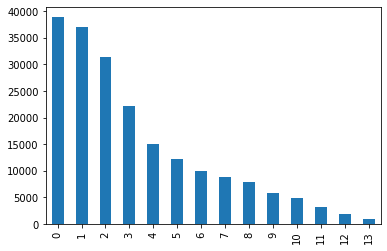

In [17]:
train_data['label'].value_counts().plot.bar()

In [9]:
def func(x):
  dic = {}
  for i in list(x):
    for word in i.split(' '):
      if word not in dic:
        dic[word] = 1
      else:
        dic[word] += 1
  lst_dic = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:5]
  return [x[0] for x in lst_dic]
train_data.groupby(['label'])['text'].apply(func)

label
0      [3750, 648, 900, 3370, 4464]
1      [3750, 648, 3370, 900, 4464]
2      [3750, 648, 900, 7399, 6122]
3      [3750, 648, 900, 6122, 4939]
4      [3750, 648, 900, 4411, 7399]
5      [3750, 648, 900, 6122, 5598]
6      [3750, 648, 900, 6248, 2555]
7      [3750, 648, 900, 3370, 5296]
8      [3750, 648, 900, 6122, 4939]
9      [3750, 648, 900, 7328, 6122]
10     [3750, 648, 900, 3370, 2465]
11     [3750, 648, 900, 4939, 6122]
12    [3750, 4464, 3370, 648, 2465]
13      [3750, 648, 900, 4939, 669]
Name: text, dtype: object